# Decision Tree Model

In this notebook we will expirement with a decision tree to get an optimal predicted repair time.

## Imports

In [54]:
from pandas import read_csv as pd_read_csv, DataFrame
from numpy import array as np_array, sqrt as np_sqrt
import matplotlib.pyplot as plt

from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, accuracy_score

## Fetching

In [55]:
df = pd_read_csv("../Data/CSV/cleaned.csv", sep=';', low_memory=False)
print(f'No less than {df.shape[0]} rows and {df.shape[1]} columns!')

No less than 252751 rows and 12 columns!


In [56]:
from scipy import stats
import numpy as np
df = df[(np.abs(stats.zscore(df[['hersteltijd_15']])) < 1).all(axis=1)]

## Model

In [57]:
model = DecisionTreeClassifier()

# bepaal features & target variabele
feature_names = ['geocode', 'prioriteit', 'oorzaakcode']
features = df[feature_names]
target_names = ['hersteltijd_15']
targets = df[target_names]

features_train, features_test, targets_train, targets_test = train_test_split(features, targets, random_state=10)
model.fit(features_train, targets_train)
print(f'{len(features_train)} elementen in de trainset en {len(features_test)} elementen in de testset')

165012 elementen in de trainset en 55004 elementen in de testset


In [58]:
# M.b.v. de score wordt de accuracy berekend: het percentage voorspellingen dat correct
score_1 = model.score(features_test, targets_test)

# Alternatieve manier om de voorspellende waarde te berekenen is door het model de klasse te voorspellen voor
# de testset van de features en deze te vergelijken met de testset van de klassen.
targets_model = model.predict(features_test)
score_2 = accuracy_score(targets_test, targets_model)
print(f'Scores (methode 1 = {score_1}) and (methode 2 = {score_2}) so the methods are equal is {score_1 == score_2}.')
print(f'With a mean error of: {mean_squared_error(targets_test, targets_model)}')

Scores (methode 1 = 0.3648280125081812) and (methode 2 = 0.3648280125081812) so the methods are equal is True.
With a mean error of: 827.6943495018544


## Displaying

[Text(558.0, 475.65000000000003, 'oorzaakcode <= 296.0\ngini = 0.759\nsamples = 165012\nvalue = [63126, 37278, 24953, 18803, 12053, 8799]'),
 Text(279.0, 339.75, 'prioriteit <= 4.5\ngini = 0.769\nsamples = 157521\nvalue = [56551, 36856, 24763, 18642, 11966, 8743]'),
 Text(139.5, 203.85000000000002, 'oorzaakcode <= 272.0\ngini = 0.756\nsamples = 106011\nvalue = [41172, 23841, 15976, 11738, 7698, 5586]'),
 Text(69.75, 67.94999999999999, '\n  (...)  \n'),
 Text(209.25, 67.94999999999999, '\n  (...)  \n'),
 Text(418.5, 203.85000000000002, 'oorzaakcode <= 182.5\ngini = 0.789\nsamples = 51510\nvalue = [15379, 13015, 8787, 6904, 4268, 3157]'),
 Text(348.75, 67.94999999999999, '\n  (...)  \n'),
 Text(488.25, 67.94999999999999, '\n  (...)  \n'),
 Text(837.0, 339.75, 'oorzaakcode <= 298.5\ngini = 0.225\nsamples = 7491\nvalue = [6575, 422, 190, 161, 87, 56]'),
 Text(697.5, 203.85000000000002, 'prioriteit <= 3.0\ngini = 0.2\nsamples = 6691\nvalue = [5970, 347, 141, 127, 67, 39]'),
 Text(627.75, 67

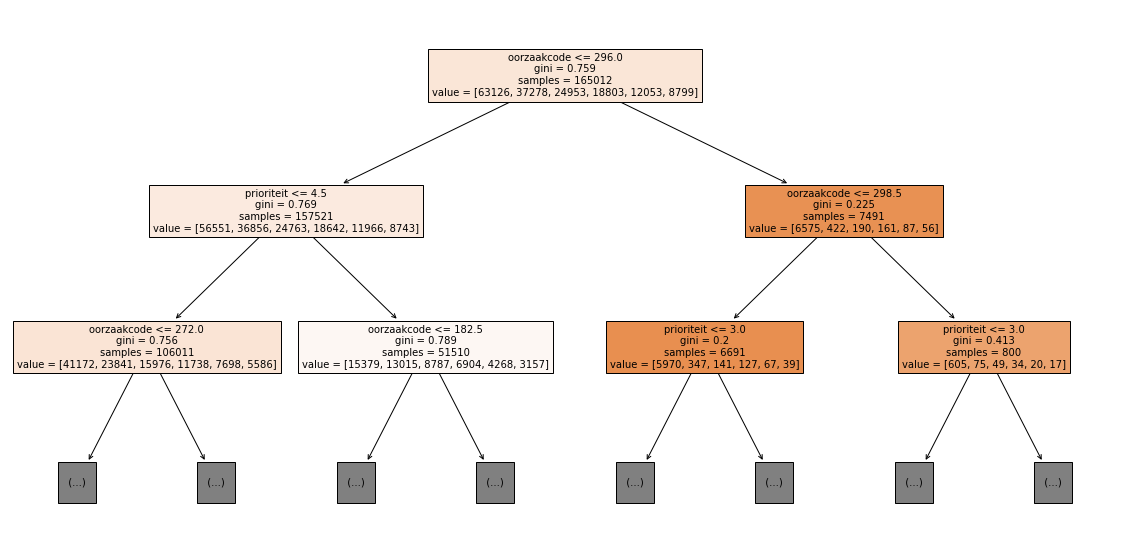

In [59]:
plt.figure(figsize=(20, 10))
plot_tree(model, feature_names=feature_names, filled=True, max_depth=2, fontsize=10)

## Predicting

In [60]:
subset_df = pd_read_csv("../Data/CSV/subset.csv", sep=';')
features = subset_df[feature_names]
targets = subset_df['hersteltijd_15']
subset_df.head()

,meldnummer,oorzaakcode,prioriteit,melddatum,geocode,beschrijving,hersteltijd,hersteltijd_15
0,80774347,130,9,2014-07-31 10:28:00,555,test ESB,2,0
1,80626718,298,9,2011-07-31 11:43:00,666,"Mtna : E-boog AC-trip aangesproken, geen trei...",1,0
2,80878866,221,9,2017-01-31 10:43:25,564,Gvc : Inttel geeft fout melding.,186,180
3,80704628,221,9,2013-01-31 09:20:00,114,"Wspl : RH60 gelijkrichter defect, er staa een...",59,45
4,80651548,221,9,2012-01-31 01:52:00,76,Bv-Utg : sp BA t.o.b.s. gemaakt tijdens werkz...,155,150


In [61]:
targets_model = model.predict(features)
score = accuracy_score(targets, targets_model)
print(f'Score = {score}, predictions = {targets_model}, ground truth = {targets.values}.')

Score = 0.7, predictions = [ 0  0  0 45  0  0  0  0  0 45], ground truth = [  0   0 180  45 150   0 195   0   0  45].


## Saving

In [62]:
subset_df['hersteltijd_dt'] = targets_model
subset_df.to_csv('../Data/CSV/subset.csv', sep=';', index=False)